In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Country-data (1).csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
#Checking for null values. None found.
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
#Checking for duplicates. None found.
len(df) == len(df.drop_duplicates())

True

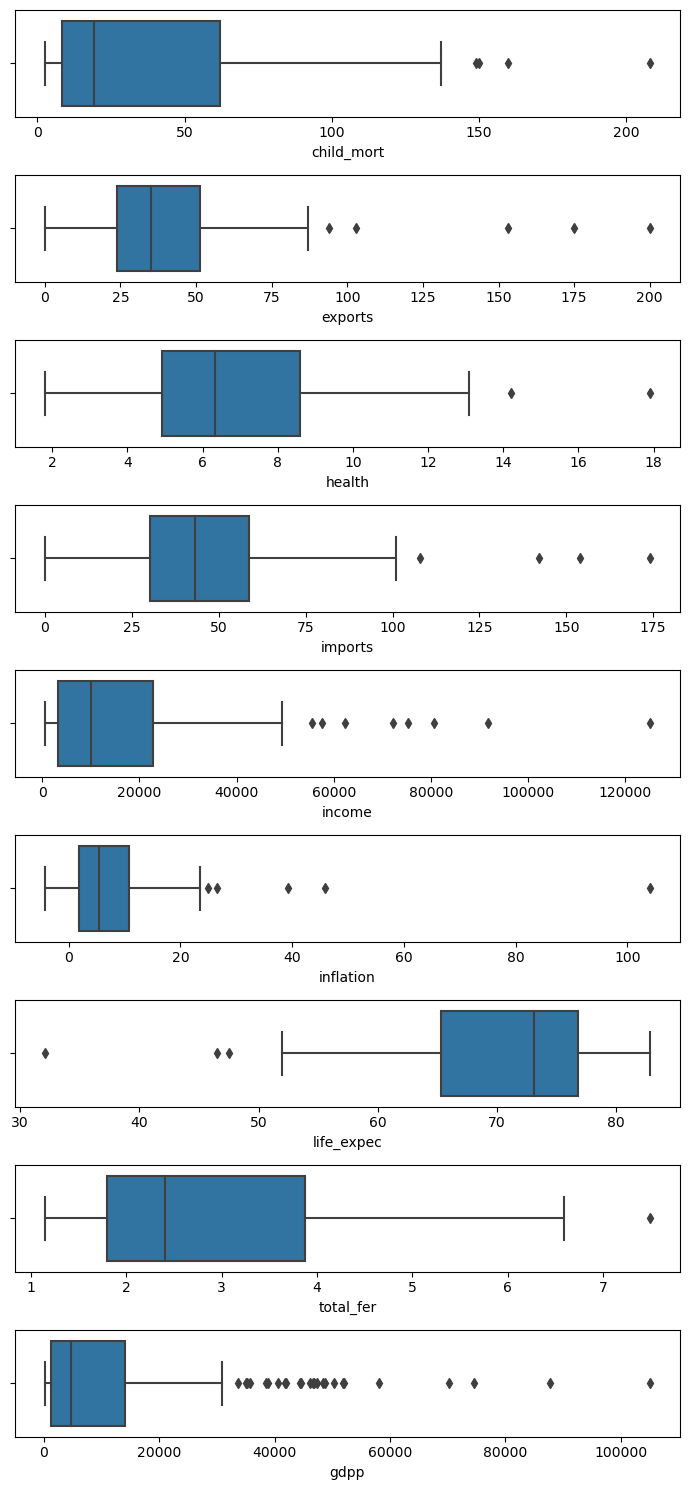

In [5]:
#Making boxplots to see if there are any outliers
fig, axes = plt.subplots(nrows=len(df.iloc[:,1:].columns),figsize=(7,15))
for i in range(len(df.iloc[:,1:].columns)):
    sns.boxplot(ax=axes[i],x=df.iloc[:,1:].iloc[:,i],data=df.iloc[:,1:])
plt.tight_layout()

In [6]:
#Now we will coerce the outliers 
columns = list(df.iloc[:,1:].columns)   
def outlier_detection(cols):
    Q1,Q3 = np.percentile(cols,[25,75])
    IQR = Q3-Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    return upper_bound,lower_bound
for cols in columns:
    upper_bound,lower_bound = outlier_detection(df[cols])
    df[cols] = np.clip(df[cols],a_min=lower_bound,a_max=upper_bound)

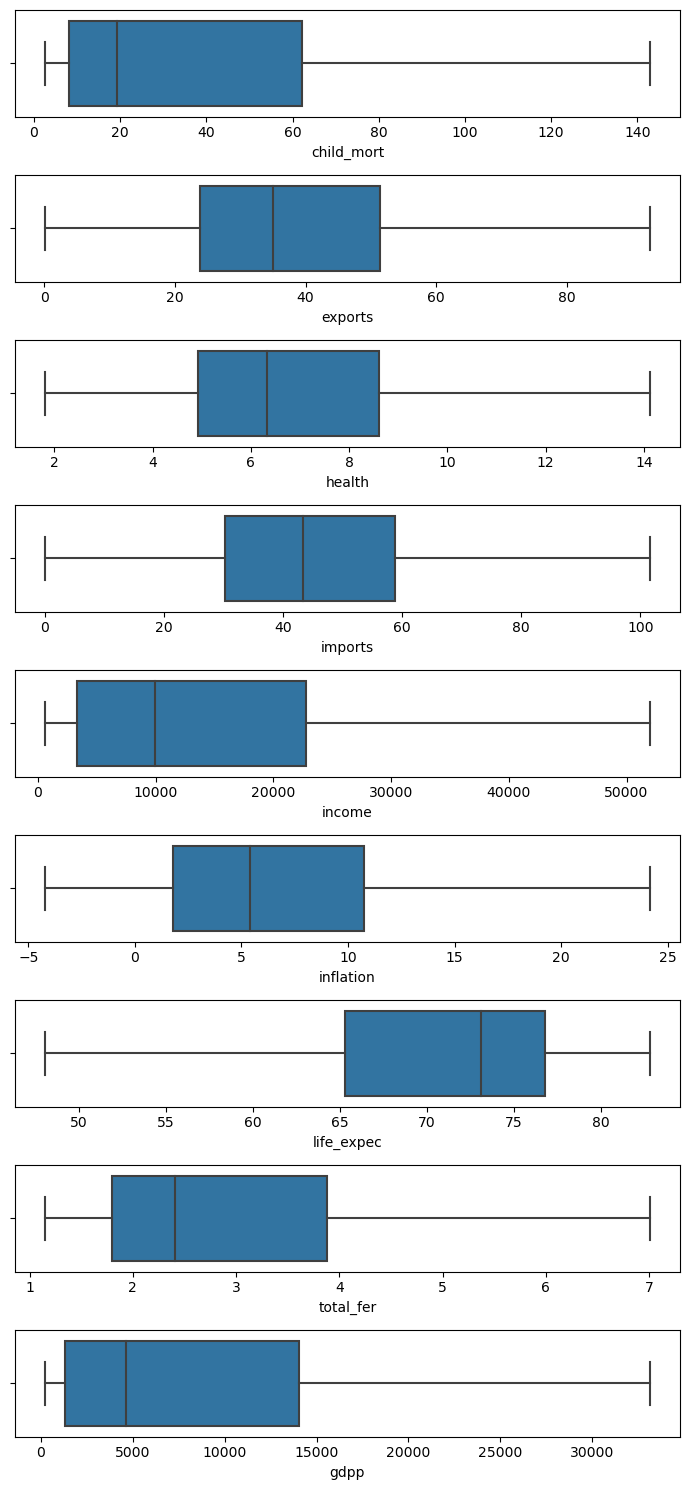

In [7]:
#No outliers or extremes left
fig, axes = plt.subplots(nrows=len(df.iloc[:,1:].columns),figsize=(7,15))
for i in range(len(df.iloc[:,1:].columns)):
    sns.boxplot(ax=axes[i],x=df.iloc[:,1:].iloc[:,i],data=df.iloc[:,1:])
plt.tight_layout()

<AxesSubplot:>

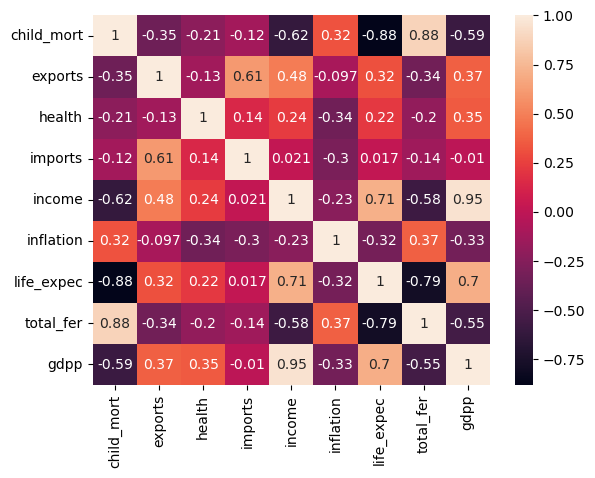

In [8]:
#Checking for mutlicolinearity. Some features are strongly multicolinear. 
sns.heatmap(df.corr(),annot=True)

In [9]:
#Getting the features based on which we will predict the clusters
X = df.iloc[:,1:].copy()

In [10]:
#We first need to scale our data, because the models that we will use, compute the distance between the datapoints.
scaler = StandardScaler()
X = scaler.fit_transform(X)

<font size="5">KMeans model with PCA</font>

In [11]:
#We will reduce the dimension to 2.
#Standartization has already been done.
pca = PCA(n_components = 2)
X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

In [12]:
# We are explaining around 64% of the variance.
explained_variance

array([0.48892383, 0.16452848])

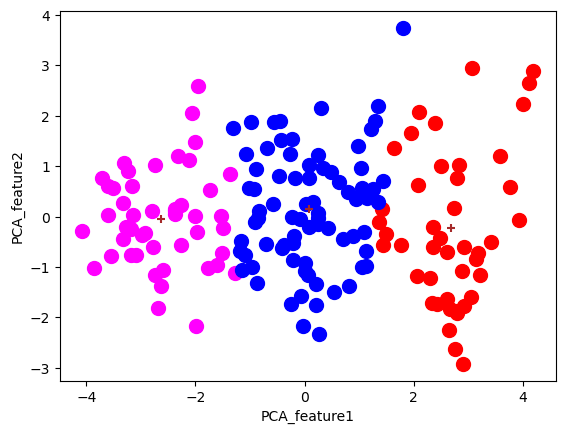

In [13]:
#Building the model and visualising the clusters. We are using 3 clusters, as it is required.
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='red')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='blue')
plt.xlabel('PCA_feature1')
plt.ylabel('PCA_feature2')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "brown",marker='+')

In [24]:
print('Sum of squared distances: ',kmeans.inertia_)
print('Average silhouette score: ',silhouette_score(X, y_kmeans))

Sum of squared distances:  337.0266523848096
Average silhouette score:  0.3693350975837046


In [14]:
df1 = df[['country']].copy()
df1['clusters'] = y_kmeans

In [15]:
# From the dataframe below, we make a conclusion that the cluster 0 corresponds to under-developing countries.
#cluster 2 corresponds to developing countries and cluster 1 corresponds to developed countries.
#Therefore, we will add a column "development" based on our inferences
df1.iloc[:50,:]

,country,clusters
0,Afghanistan,0
1,Albania,2
2,Algeria,2
3,Angola,0
4,Antigua and Barbuda,2
5,Argentina,2
6,Armenia,2
7,Australia,1
8,Austria,1
9,Azerbaijan,2


In [16]:
#Therefore, we will add a column "development" based on our inferences
df1['development'] = 'Developed'
df1.loc[df1['clusters']==0,'development'] = 'Under-developed'
df1.loc[df1['clusters']==2,'development'] = 'Developing'
df1

,country,clusters,development
0,Afghanistan,0,Under-developed
1,Albania,2,Developing
2,Algeria,2,Developing
3,Angola,0,Under-developed
4,Antigua and Barbuda,2,Developing
...,...,...,...
162,Vanuatu,2,Developing
163,Venezuela,2,Developing
164,Vietnam,2,Developing
165,Yemen,0,Under-developed


In [17]:
#Showing the value counts for each development status
df1['development'].value_counts()

Developing         76
Under-developed    47
Developed          44
Name: development, dtype: int64

<font size="5">Hierarchical clustering with PCA</font>

Text(0, 0.5, 'euclidean distance')

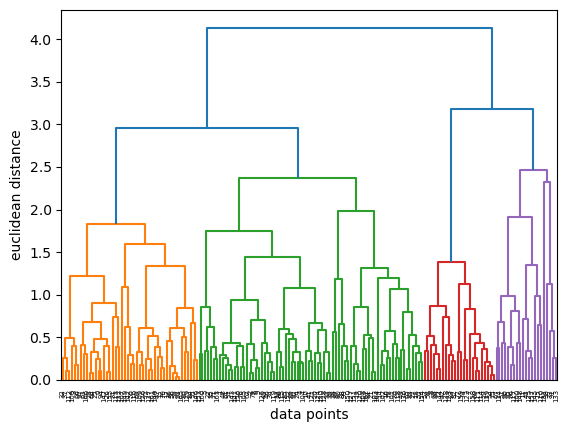

In [18]:
#Building a dendrogram. we will choose a number of clusters equal to 3.
merg = linkage(X,method="average")
dendrogram(merg)
plt.xlabel("data points")
plt.ylabel("euclidean distance")

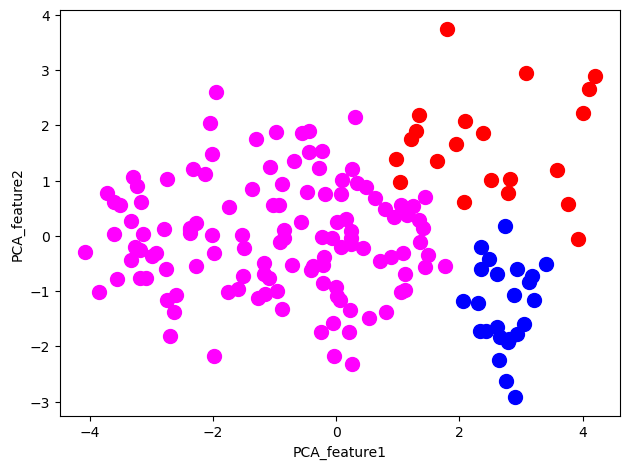

In [19]:
# Building the model and visualising the clusters
h_c = AgglomerativeClustering(n_clusters = 3,affinity= "euclidean",linkage = "average")
cluster_hc = h_c.fit_predict(X)
plt.scatter(X[cluster_hc==0,0],X[cluster_hc==0,1],s=100,c='magenta')
plt.scatter(X[cluster_hc==1,0],X[cluster_hc==1,1],s=100,c='red')
plt.scatter(X[cluster_hc==2,0],X[cluster_hc==2,1],s=100,c='blue')
plt.xlabel('PCA_feature1')
plt.ylabel('PCA_feature2')
plt.tight_layout()

In [20]:
df2 = df[['country']].copy()
df2['clusters'] = cluster_hc

In [21]:
# From the dataframe below, we make a conclusion that the cluster 0 corresponds to under-developing countries.
#cluster 2 corresponds to developed countries and cluster 1 corresponds to developing countries.
#Therefore, we will add a column "development" based on our inferences
df2.iloc[:50,:]

,country,clusters
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Angola,0
4,Antigua and Barbuda,0
5,Argentina,0
6,Armenia,0
7,Australia,2
8,Austria,2
9,Azerbaijan,0


In [22]:
#Therefore, we will add a column "development" based on our inferences
df2['development'] = 'Developed'
df2.loc[df2['clusters']==0,'development'] = 'Under-developed'
df2.loc[df2['clusters']==1,'development'] = 'Developing'
df2

,country,clusters,development
0,Afghanistan,0,Under-developed
1,Albania,0,Under-developed
2,Algeria,0,Under-developed
3,Angola,0,Under-developed
4,Antigua and Barbuda,0,Under-developed
...,...,...,...
162,Vanuatu,0,Under-developed
163,Venezuela,0,Under-developed
164,Vietnam,0,Under-developed
165,Yemen,0,Under-developed


In [23]:
#Showing the value counts for each development status. K Means appears to give better results.
df2['development'].value_counts()

Under-developed    122
Developed           24
Developing          21
Name: development, dtype: int64